# CapStone Project for the [**Google Data Analystics**](https://www.coursera.org/professional-certificates/google-data-analytics) course teachings.

* This is an evolving document of my personal analysis. For learning actives only, and will continue to change in the next several weeks.

## Goal: Use Smart device data to help the wellness companies(BellaBeat) make better marketing strategies. 




# Prepare
* import our libraries and data, and get an over view of what we have in our data
* get an over view of teh data 
* merging files is needed. Will ned to merge on ID and date
* The weight column also has times. Make two additonal columns, one for dates, one for times. This will help for addtional analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# master file
dailyActivity = r"C:\Users\Jacque Quinn Trahan\Desktop\My Personal Project\CapStone Project(s)\Google Analytics\Bellabeat\Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv"
sleepDay = r"C:\Users\Jacque Quinn Trahan\Desktop\My Personal Project\CapStone Project(s)\Google Analytics\Bellabeat\Fitabase Data 4.12.16-5.12.16\dailySteps_merged.csv"

df_Activity = pd.read_csv(dailyActivity)
df_sleepDay = pd.read_csv(sleepDay)


In [3]:
df_Activity.head(1)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985


In [4]:
df_Activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [5]:
df_sleepDay.head(1)

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162


In [6]:
df_sleepDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   StepTotal    940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


# Process

#### Before merging we need to format or columns the same data types adn formats

In [7]:
df_Activity['ActivityDate'] = pd.to_datetime(df_Activity['ActivityDate'])
df_Activity['ActivityDate'].dtype

dtype('<M8[ns]')

In [8]:
df_sleepDay['ActivityDay'] = pd.to_datetime(df_sleepDay['ActivityDay'])
df_sleepDay['ActivityDay'].dtype

dtype('<M8[ns]')

In [9]:
# before merging we need to format or columns the same way
print(df_Activity['ActivityDate'])
print(df_sleepDay['ActivityDay'])

0     2016-04-12
1     2016-04-13
2     2016-04-14
3     2016-04-15
4     2016-04-16
         ...    
935   2016-05-08
936   2016-05-09
937   2016-05-10
938   2016-05-11
939   2016-05-12
Name: ActivityDate, Length: 940, dtype: datetime64[ns]
0     2016-04-12
1     2016-04-13
2     2016-04-14
3     2016-04-15
4     2016-04-16
         ...    
935   2016-05-08
936   2016-05-09
937   2016-05-10
938   2016-05-11
939   2016-05-12
Name: ActivityDay, Length: 940, dtype: datetime64[ns]


In [10]:
df = pd.merge(df_Activity, df_sleepDay,
             left_on=['Id', 'ActivityDate'],
             right_on=['Id', 'ActivityDay'],
             how='left')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 939
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [12]:
# Prevent SettingCopyWarning messages but making a copy of our data base
# also allows us to keep teh main df intact just in case we need it later. 
fitbit_data = df.copy()
# Make sure our data loaded, and get a quick summary of teh type 5 rows.
fitbit_data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDay,StepTotal
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-04-12,13162
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2016-04-13,10735
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,2016-04-14,10460
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,2016-04-15,9762
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2016-04-16,12669


In [13]:
# Quick overview of rows adn columns. Also will show us if any missing values are present. 
fitbit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 939
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

#### Our .info() function summarary:
* No missing values in the cells themselves(will need to confirm this).
* Our activityDate column is an object and will need to be made in to a date or datetime data type.
* 940 rows and 15 columns.

In [14]:
# I would like to see what day consumers work out teh mostly later on. So lets make a new column for teh day of teh week
fitbit_data['DayOfWeek'] = fitbit_data['ActivityDate'].dt.day_name()

In [15]:
fitbit_data['DayOfWeek'].dtype

dtype('O')

In [16]:
fitbit_data['DayOfWeek']

0        Tuesday
1      Wednesday
2       Thursday
3         Friday
4       Saturday
         ...    
935       Sunday
936       Monday
937      Tuesday
938    Wednesday
939     Thursday
Name: DayOfWeek, Length: 940, dtype: object

#### Mathematical summary of your data

In [17]:
fitbit_data.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,StepTotal
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,7637.910638
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,5087.150742
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,3789.750000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,7405.500000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,10727.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,36019.000000


#### Potential issues:
* Need to look into LoggedActivitiesDistance column and see what is going on there. Seems very low. 
* Distance - Cannot find if it is in miles or kilometers for this data set. According to [Fitbit's](https://community.fitbit.com/t5/Blaze/Changing-kilometers-to-miles/td-p/2406449#:~:text=If%20you're%20doing%20it%20from%20your%20computer%2C%20click%20on,change%20it%20to%20your%20preference.) community discussions, this can be changed. 
> * I would assume miles in the USA and everywhere else Kilometer. 
> * USA military member would be more than likely the outliers for this. 
> * Speculation for now, I did not see by county as an option so we are missing data for this aspect. 

##### Our .describe() function summary:

* We have **Averages** for each column:
> * For resting times (Sedentary - Unless you do at least 30 minutes per day of intentional exercise, you are considered sedentary) is very high at 991.21 minutes. 
> * How do we motivate people to be more active i.e.:
> > * Recreational sports
> > * Events
> > * Discounts to local gyms, with a certain purchase amount
> > * What months are the most active? The least?
> * Total steps is 7637.91. This is a little less than the [CDC's](https://www.cdc.gov/diabetes/prevention/pdf/postcurriculum_session8.pdf) **Lifestyle Coach Facilitation Guide: Post-Core** recommends 10,000 steps. 
> * Calories burned 2303.61

* Our highest **(max)** readings:
> * Total steps - 36019
> * Total **Distance** - 28 **(kilometers or miles?)**
> * Active distance - 21.92
> * Moderate active distance - 6.48
> * Light Active distance - 10.71
> * Active mins. - 210
> * Moderate active mins. -143
> * Light Active mins. - 518
> * Sedentary mins. - 1440
> * Calories 4900


In [18]:
# Checks to see how many value counts there are. Ther should be 940
fitbit_data['LoggedActivitiesDistance'].value_counts()

0.000000    908
2.092147      9
2.253081      7
4.081692      1
4.861792      1
4.878232      1
4.912368      1
2.832326      1
4.911146      1
4.885605      1
4.924841      1
2.785175      1
1.959596      1
4.930550      1
3.285415      1
4.851307      1
4.869783      1
3.167822      1
4.942142      1
Name: LoggedActivitiesDistance, dtype: int64

**We have 940 entries but as suspect 908 are zeros.** I did not know the actual count but thought the data looked odd. Due to this we onlyhave data for 32 rows we can not do any analysis on this column and we will drop it from our data set

In [19]:
# drop the column we can not use
fitbit_data.drop(labels='LoggedActivitiesDistance', axis=1, inplace=True)

# Analyze & Share

In [20]:
# Added this to see where my columns are for the seaborn pair plot. 
fitbit_data.head(0)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDay,StepTotal,DayOfWeek


#### I like to run this first to see which columns realation ships are there as a whole. This helps me decide what route I would like to take next.

Text(0.5, 1.08, 'Overview of Whole Dataset')

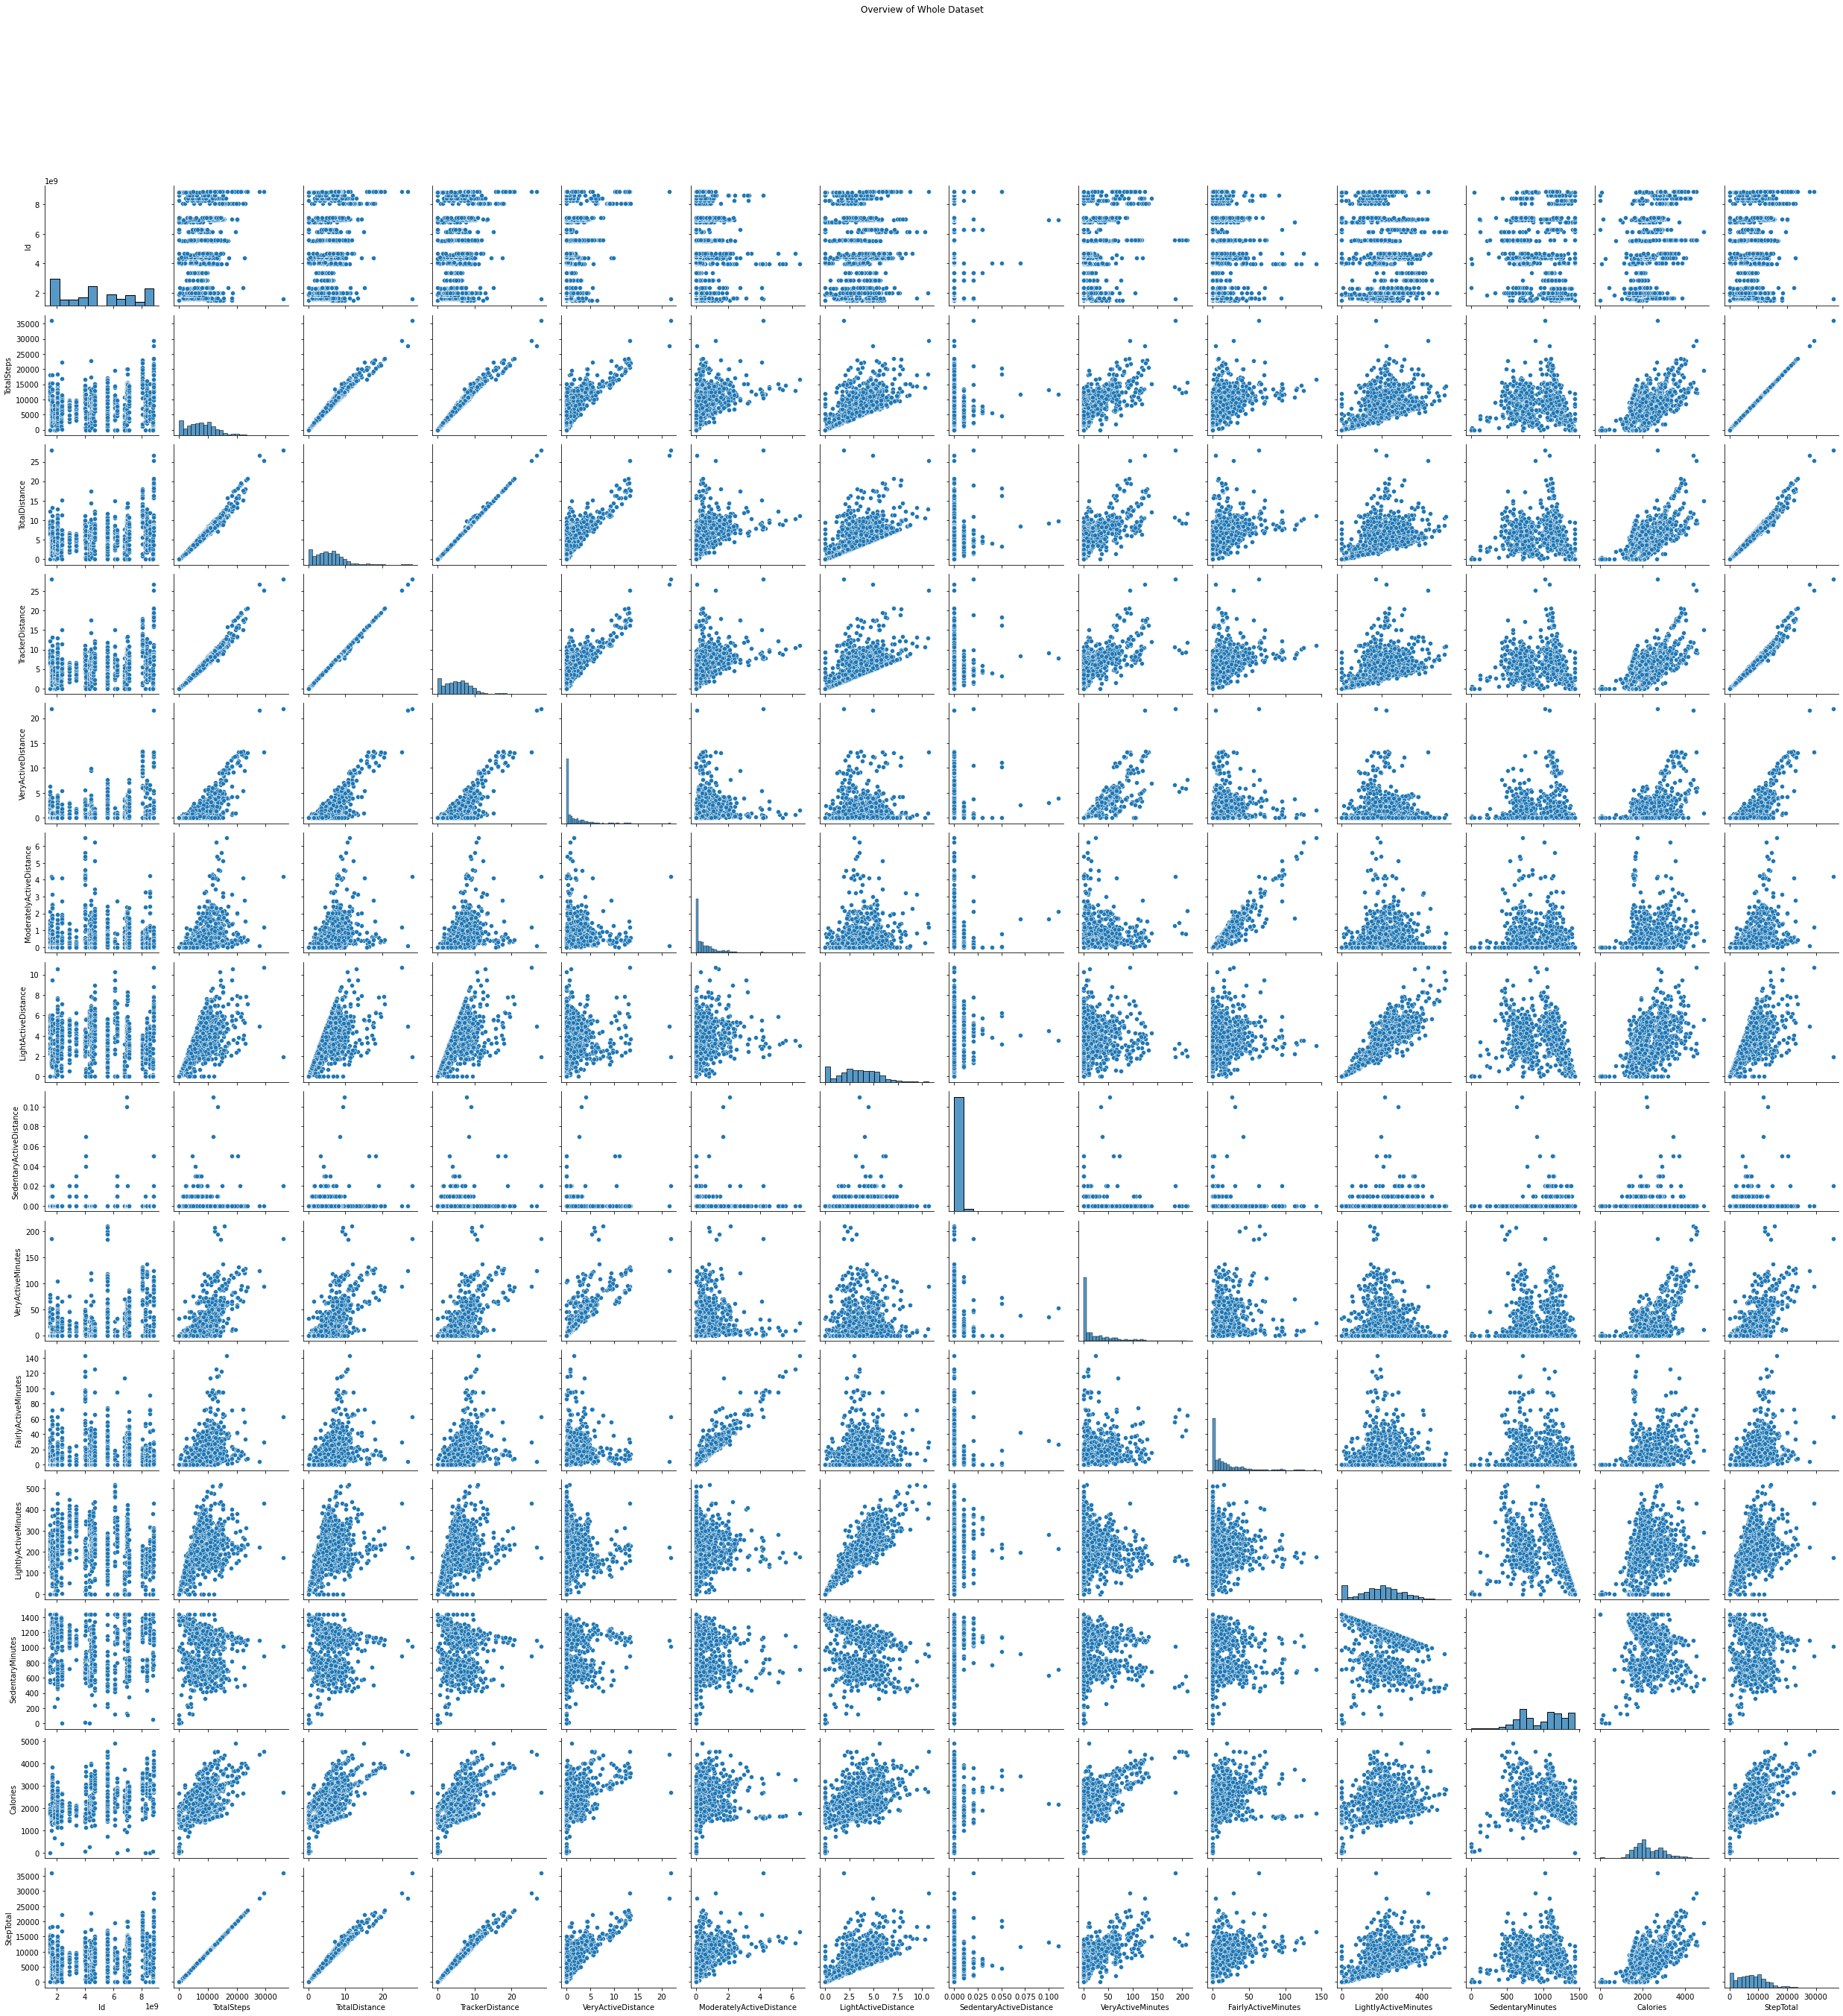

In [21]:
# First I want to get a complet overview of each column
# not recommend for very wide data sets. **(Will also take a little time to run.)**
g = sns.pairplot(data=fitbit_data)
g.fig.suptitle('Overview of Whole Dataset', y=1.08, fontsize=12)

#### jointplot
The More steps we take the more calories we burn. There are a few outliers, this I would assume to be beacuse the intensity rates.

Text(0.5, 1.08, 'Total steps vs Calories Burned')

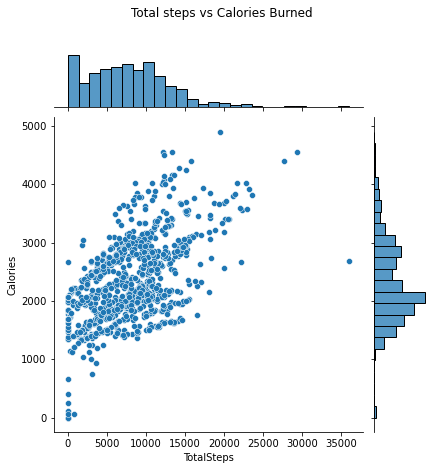

In [22]:
# relationship between Total steps vs Calories Burned

f = sns.jointplot(data=fitbit_data, y='Calories', x='TotalSteps')
f.fig.suptitle('Total steps vs Calories Burned', y=1.08, fontsize=12)

#### lineplot
This comparison shows me if we can keep a light intensity we can have a steady burn of calories. Also, this also show me some habits of consumers who may have start low intensity and finish high intensity and vice versa.

It also shows that light insentiy is much more perfered, but want to look a little more into that

[Text(0.5, 1.0, 'Distance vs Calories Burned')]

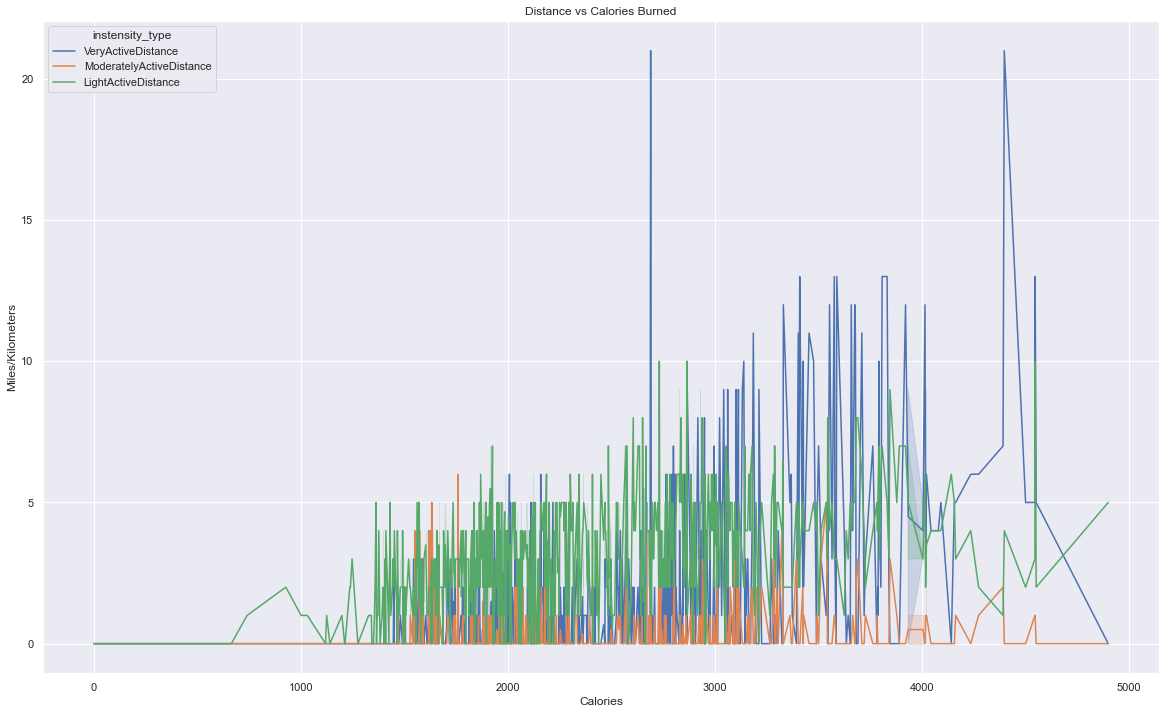

In [23]:
# relationship between Intensity by Distance vs Calories Burned
# need to seperate and stack the three columns we need to compare vs Calories
intensity = fitbit_data[['Calories', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance']]
intensity = intensity.set_index('Calories').stack().reset_index()
intensity.columns=['Calories', 'instensity_type', 'Miles/Kilometers']
intensity['Miles/Kilometers'] = intensity['Miles/Kilometers'].astype(int) # needed to make an interger. Would not work as a float


# now plot our new dataframe
sns.set(rc={'figure.figsize':(20,12)})# resize our plot. This will add the seaborn defualt grey back ground. 
sns.lineplot(data=intensity, x='Calories', y='Miles/Kilometers', hue='instensity_type').set(title="Distance vs Calories Burned")


#### Bar Plot(Intensity by distance vs by day)
* This shows us that this data set has majority of teh consumer likely a light intesity thoruhg much of the week. 
* High intesnsity is the next highest and stays pretty consistant except on Thursday, Friday, and Satuday goes back up
* Moderate intensity is our lowest and  only really goes up on Sunday, Tuesday, Satuday, and Sunday. 

[Text(0.5, 1.0, 'Intensity by distance vs by day')]

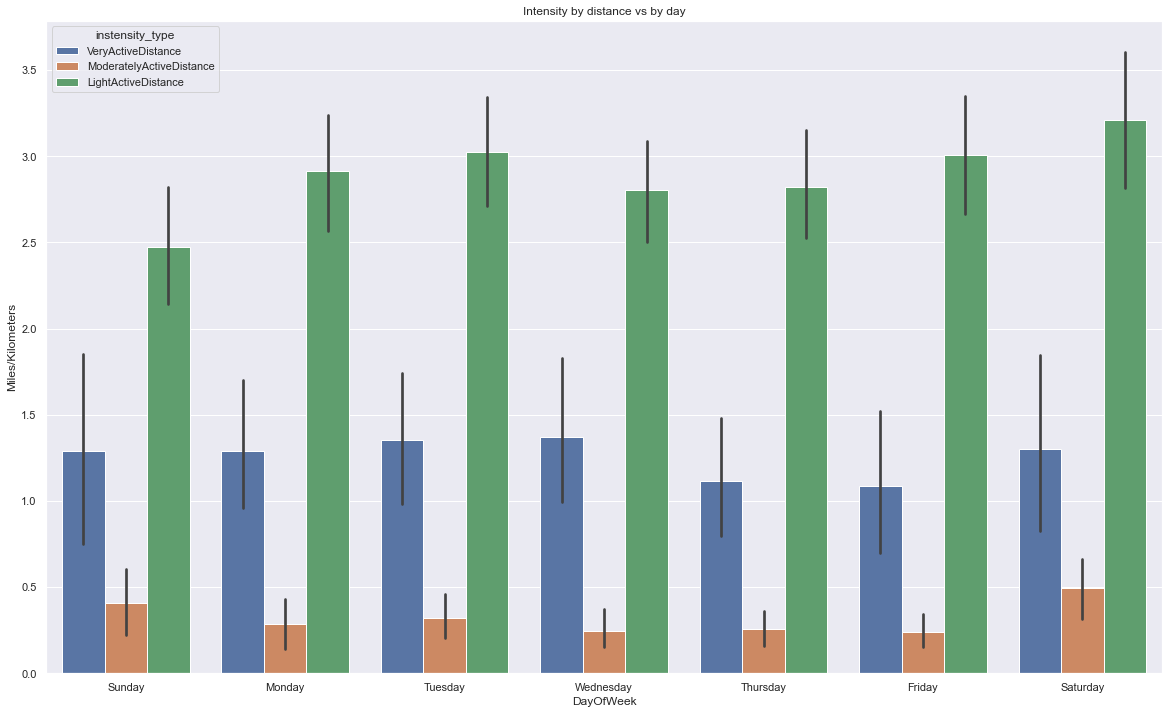

In [24]:
# relationship between Intensity by distance vs by day
# need to seperate and stack the three columns we need to compare vs Calories
DayOfWeek = fitbit_data[['DayOfWeek', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance']]
DayOfWeek = DayOfWeek.set_index('DayOfWeek').stack().reset_index()
DayOfWeek.columns=['DayOfWeek', 'instensity_type', 'Miles/Kilometers']
DayOfWeek['Miles/Kilometers'] = intensity['Miles/Kilometers'].astype(int) # needed to make an interger. Would not work as a float


# boxplot the results & order the days of the for easy viewing adn interperting

order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
sns.barplot(data=DayOfWeek, x='DayOfWeek', y='Miles/Kilometers', hue='instensity_type',
            order=order).set(title='Intensity by distance vs by day')

#### Barplot(Sedentary Activity(mins) vs Day of Week)
* This shows us we have a very high rate of rest time from the consumers in this data set everyday of the week.
* How could we make people more active/increase intensity/lower the sedentary minture during the activies?

[Text(0.5, 1.0, 'Sedentary Activity(mins) vs Day of Week')]

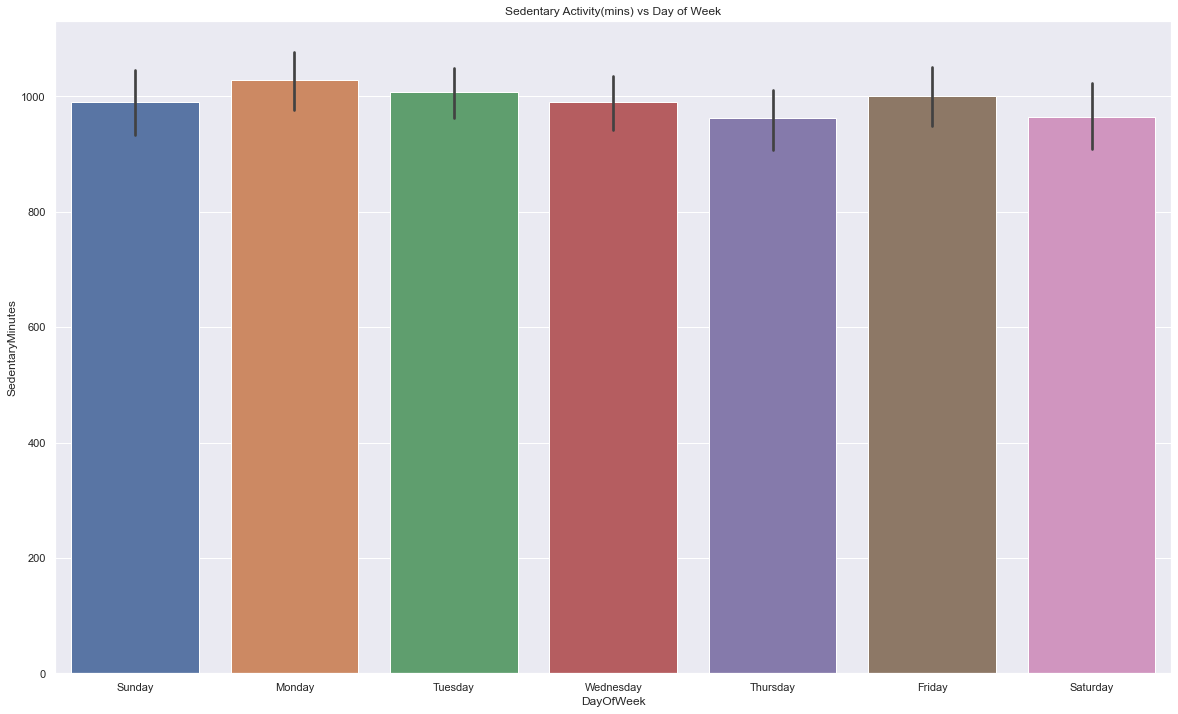

In [25]:
# What does had the highest amount of Total Sedentary Activity based on minutes vs day of week
sns.barplot(data=fitbit_data, x='DayOfWeek', y='SedentaryMinutes', order=order)\
.set(title='Sedentary Activity(mins) vs Day of Week')

#### Barplot(Sedentary Total sleep time vs Day of Week)
* Sunday surpisingly is the day people get teh least amount of sleep in this data set
* You can see a trend on Wed. Thurs.,Fri. that less sleep occurs, then satuday is the caught up day. This happend again in the same way for Sun. and Mon. 

[Text(0.5, 1.0, 'Total sleep time vs Day of Week')]

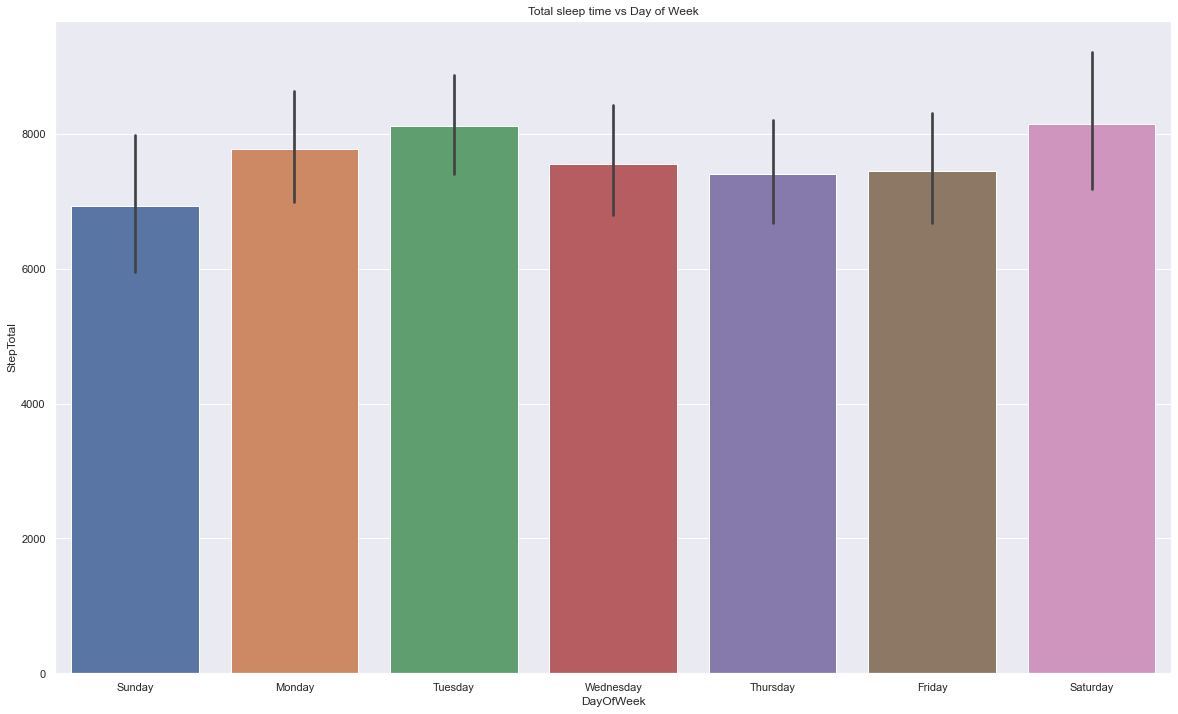

In [26]:
# Total sleep time compared to the day of the week
sns.barplot(data=fitbit_data, x='DayOfWeek', y='StepTotal', order=order)\
.set(title=('Total sleep time vs Day of Week'))

#### Joint Plot(# sleep time vs SedentaryMinutes)
* There is a trend of teh more Sedentary minue occurring, less sleep occurs
* Looks like a few outliers,which could be days that people forgot to wear/charge their device. 

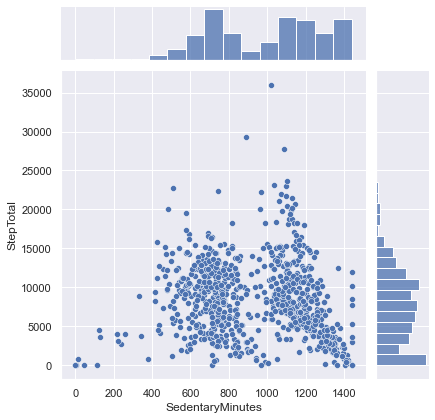

In [27]:
# sleep time vs SedentaryMinutes seperated
sns.jointplot(data=fitbit_data, x='SedentaryMinutes', y='StepTotal')

#### Joint Plot(# sleep time vs SedentaryMinutes seperated by intesity type)
* Adding in the intensity type from one of our above charts we can not make out which intensity is better for sleep
* More data is needed

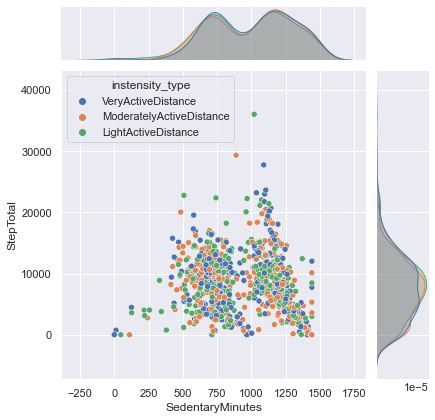

In [28]:
# sleep time vs SedentaryMinutes seperated by intesity type
sns.jointplot(data=fitbit_data, x='SedentaryMinutes', y='StepTotal', hue=DayOfWeek['instensity_type'])

# ACT

# Issues I see with the data set and reccomendations. 
* Need to look into LoggedActivitiesDistance column and see what is going on there. Seems very low. 
> * deleted column due to lack of data. Seems that this is categorozied in three parts but it is not totaled correctly in the app. 
* Distance - Cannot find if it is in miles or kilometers for this data set. According to [Fitbit's](https://community.fitbit.com/t5/Blaze/Changing-kilometers-to-miles/td-p/2406449#:~:text=If%20you're%20doing%20it%20from%20your%20computer%2C%20click%20on,change%20it%20to%20your%20preference.) community discussions, this can be changed/ show teh indication of which one is being displayed.
* Making business decison with the current amount of data is a big risk. There are some open ended questions, and I would ask my supervior or current stakeholder if I can grab more data from other simlar sources with approval. 

# Summary

By having access to personal data that is live when collet from customers/consumer is a major plus. Personally I would have like to have more data before making some decision, in a real world aspect this would be my first choice.

That said after analyzing Fitbit Fitness Tracker Data here are a **few insights that can help marketing**

#### Target Audience:
1. Individuals who current work out, play sports, have regular out door actives would be our biggest market.
2. Those who want to get back into shape.
3. Those who work at a desk all day, and may need reminders every hour or set to move around/light work outs.

**Note** Gender, age, how/what actives being done were not part of data set. If this could be obtained we could possible improve our analysis. 


#### BellaBeat app Ideas
The BellaBeat app should not just be another space on someone's iPhone or watch but full on professional and personal life balancer. 
* 1. We could show healthy habits of other to choose which plane works better for each person. This way every person had their own experience
* 2. With the current day we can show that the higher our rest (sedentary) times are we are more like to have less sleep.
* 3. With the mode on at night before bed can promote the user for a daily over view of our activity. Sort of like the year reminder of photos we too, that some other have
> * This would also give the user a choice to view it or not. 
* With the current CDC recommendations showing we need 10,000 steps a day BellaBeat could use that as an encouragement for the users.
> * We could also give the user a choice to have reminders set up.


**Thank You** for taking the time to look at this notebook. This is my first real [Kaggle](https://www.kaggle.com/datasets/arashnic/fitbit) post and I enjoyed doing it. Any recommendation or some creative criticism would be amazing!
